In [ ]:
#run to upload files
from google.colab import files
files.upload()

In [ ]:
# Normality Test 
# If the data follows the normal distribution , then ANOVA 
# If the data does not follow the normal distribtion , then kruskalwallis.

In [ ]:
import pandas as pd
Data = pd.read_excel("/content/NASAEM_COLAB.xlsx", sheet_name = "Sheet2")
Data.head(5)

,بكالوريوس تمريض,دبلوم تمريض,معهد فنى تمريض
0,95.000000,81.666667,78.333333
1,73.333333,76.666667,78.333333
2,75.000000,76.666667,90.000000
3,95.000000,80.000000,78.333333
4,80.000000,80.000000,76.666667


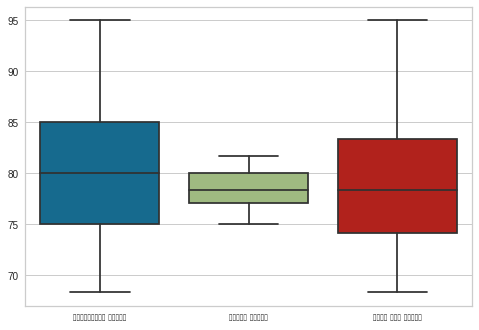

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=Data)

In [ ]:
#import dependencies
import pandas as pd
from scipy.stats import mstats
import numpy as np
Data = pd.read_excel("/content/NASAEM_COLAB.xlsx", sheet_name = "Sheet2")
#groups
Col_1 = Data['بكالوريوس تمريض'].to_numpy()
Col_2 = Data['دبلوم تمريض'].to_numpy()
Col_3 = Data['معهد فنى تمريض'].to_numpy()

#test
print("Kruskal Wallis H-test test:")

H, pval = mstats.kruskalwallis(Col_1, Col_2, Col_3)

print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

Kruskal Wallis H-test test:
H-statistic: 1.0530082199350783
P-Value: 0.5906662688632445
Accept NULL hypothesis - No significant difference between groups.


In [ ]:
df = pd.read_excel("/content/NASAEM_COLAB.xlsx", sheet_name = "Sheet1")
df.head(2)

,NAME,DEPARTMENT,QUALIFICATION,YEARS_OF_EXPERIENCE_FROM_GRADUATION,APPRASIAL
0,رانيا السيد عبد السميع سليم,OPD,دبلوم تمريض,19,81.666667
1,هانى الزغبى عبدالهادى البطل,ER,بكالوريوس تمريض,7,95.000000


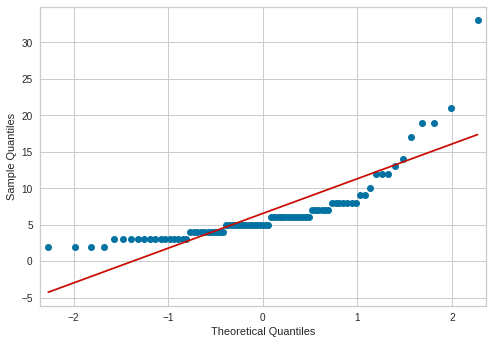

In [ ]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
df = pd.read_excel("/content/NASAEM_COLAB.xlsx", sheet_name = "Sheet1")
df1 = df['YEARS_OF_EXPERIENCE_FROM_GRADUATION']
# q-q plot
qqplot(df1, line='s')
pyplot.show()

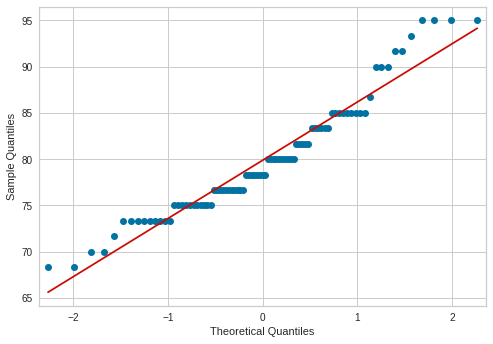

In [ ]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
df = pd.read_excel("/content/NASAEM_COLAB.xlsx", sheet_name = "Sheet1")
df = df['APPRASIAL']
# q-q plot
qqplot(df, line='s')
pyplot.show()

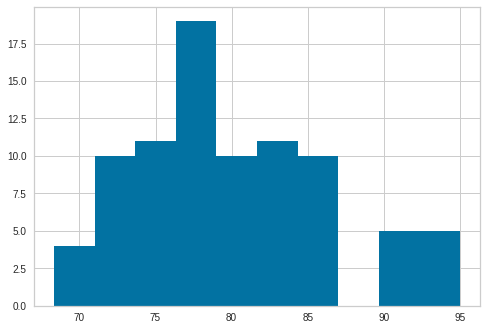

In [ ]:
pyplot.hist(df)
pyplot.show()

In [ ]:
#shapiro
from scipy.stats import shapiro
stat, p = shapiro(df)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample Is Gaussian (fail to reject H0)')
else:
	print('Sample Is Not Gaussian (reject H0)')

Statistics=0.943, p=0.001
Sample Is Not Gaussian (reject H0)


In [ ]:
## D'Agostino and Pearson's Test
from scipy.stats import normaltest
stat, p = normaltest(df)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample Is Gaussian (fail to reject H0)')
else:
	print('Sample Is Not Gaussian (reject H0)')

Statistics=6.900, p=0.032
Sample Is Not Gaussian (reject H0)


In [ ]:
#andrson darling
from scipy.stats import anderson
# normality test
result = anderson(df)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data Is normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, Is Not normal (reject H0)' % (sl, cv))


Statistic: 1.549
15.000: 0.552, Is Not normal (reject H0)
10.000: 0.629, Is Not normal (reject H0)
5.000: 0.754, Is Not normal (reject H0)
2.500: 0.880, Is Not normal (reject H0)
1.000: 1.046, Is Not normal (reject H0)
